In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("effecting_targets_of_advts.csv")

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [ ]:
data.shape

(1009, 10)

In [ ]:
data.nunique()

Daily Time Spent on Site     898
Age                           43
Area Income                  991
Daily Internet Usage         964
Ad Topic Line               1000
City                         961
Gender                         2
Country                      237
Timestamp                    998
Clicked on Ad                  2
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [ ]:
data.dtypes

Daily Time Spent on Site    float64
Age                         float64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Gender                       object
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

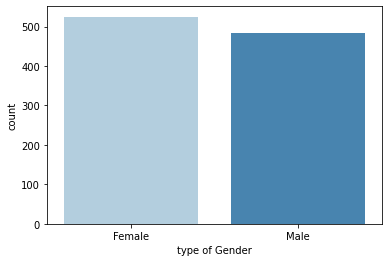

In [ ]:
sns.countplot(x='Gender', data=data, palette='Blues')
plt.xlabel('type of Gender')
plt.show()

In [ ]:
data.isnull().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [ ]:
data = data.dropna(axis = 0)

In [ ]:
data.shape

(956, 10)

In [ ]:
data.nunique()

Daily Time Spent on Site    863
Age                          43
Area Income                 955
Daily Internet Usage        922
Ad Topic Line               955
City                        929
Gender                        2
Country                     237
Timestamp                   952
Clicked on Ad                 2
dtype: int64

In [ ]:
data['Clicked on Ad'].value_counts()

1    483
0    473
Name: Clicked on Ad, dtype: int64

In [ ]:
data['Gender'].replace({'Female': 0,'Male':1},inplace=True)

In [ ]:
#plt.subplot(1,2,2)
#sns.countplot(data['City'], palette='viridis')
#plt.title("City")
#plt.show()

In [ ]:
data.dtypes

Daily Time Spent on Site    float64
Age                         float64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Gender                        int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [ ]:
all_features = ['Daily Time Spent on Site','Age',
                'Area Income','Daily Internet Usage',
                'Gender','Clicked on Ad']


X = data[all_features]
y = data['Clicked on Ad']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [ ]:
#prediction of train data

# Instantiate logistic regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict on train data
y_pred = lr.predict(X_train)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
#prediction of test data


# Instantiate logistic regression model
LR = LogisticRegression()

# Fit the model to the training data
LR.fit(X_test, y_test)

# Predict on test data
Y_pred = LR.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.9635416666666666
Precision: 0.9891304347826086
Recall: 0.9381443298969072
F1 Score: 0.9629629629629629


In [ ]:
# Preprocess data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate logistic regression model
Logreg = LogisticRegression()

# Fit the model to the training data
Logreg.fit(X_train_scaled, y_train)

# Predict on test data
y_Pred = Logreg.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_Pred)
precision = precision_score(y_test, y_Pred)
recall = recall_score(y_test, y_Pred)
f1 = f1_score(y_test, y_Pred)

print('Logistic Regression Accuracy:', accuracy)
print('Logistic Regression Precision:', precision)
print('Logistic Regression Recall:', recall)
print('Logistic Regression F1 Score:', f1)


Logistic Regression Accuracy: 1.0
Logistic Regression Precision: 1.0
Logistic Regression Recall: 1.0
Logistic Regression F1 Score: 1.0


# Hyper Parameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
hyperparameters = {'C': [0.01, 0.1, 1, 10],
                   'penalty': ['l1', 'l2']}

In [ ]:
grid_search = GridSearchCV(LR, hyperparameters, cv=5)

In [ ]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [ ]:
best_params = grid_search.best_params_


In [ ]:
best_logistic_reg = LogisticRegression(**best_params)
best_logistic_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1)

In [100]:


accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
y_train_pred=best_logistic_reg.predict(X_test_scaled)
y_Pred = best_logistic_reg.predict(X_test_scaled)


In [ ]:
accuracy = accuracy_score(y_test, y_Pred)
precision = precision_score(y_test, y_Pred)
recall = recall_score(y_test, y_Pred)
f1 = f1_score(y_test, y_Pred)

In [ ]:
print('Logistic Regression Accuracy:', accuracy)
print('Logistic Regression Precision:', precision)
print('Logistic Regression Recall:', recall)
print('Logistic Regression F1 Score:', f1)

Logistic Regression Accuracy: 1.0
Logistic Regression Precision: 1.0
Logistic Regression Recall: 1.0
Logistic Regression F1 Score: 1.0
